In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
covid_data = pd.read_csv('country_wise_latest.csv')
covid_data = pd.read_csv('covid_19_clean_complete.csv')
covid_data = pd.read_csv('day_wise.csv')
covid_data = pd.read_csv('full_grouped.csv')
covid_data = pd.read_csv('usa_county_wise.csv')
covid_data = pd.read_csv('worldometer_data.csv')
covid_data.head()
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [72]:
import pandas as pd


print(covid_data.columns)


if 'date' in covid_data.columns:
   
    covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')  
else:
    print("Warning: 'date' column not found in the DataFrame")


covid_data.drop_duplicates(inplace=True)


covid_data.reset_index(drop=True, inplace=True)

print(covid_data.head())


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'date'],
      dtype='object')
  Country/Region      Continent   Population  TotalCases  NewCases  \
0         Mexico  North America  129066160.0      462690    6590.0   
1           Peru  South America   33016319.0      455409    6590.0   
2          Chile  South America   19132514.0      366671    6590.0   
3       Colombia  South America   50936262.0      357710    6590.0   
4          Spain         Europe   46756648.0      354530    6590.0   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0      50517.0      819.0        308848.0        4140.0     103325.0   
1      20424.0      819.0        310337.0        4140.0     124648.0   
2       9889.0      819.0        340168.0        4140.0

In [50]:
print(covid_data.columns)


Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')


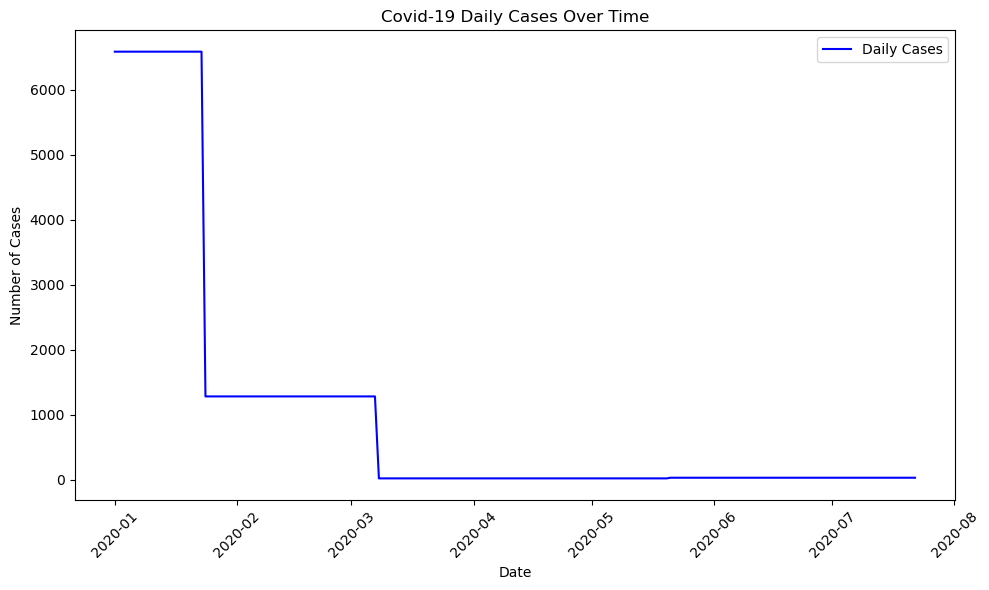

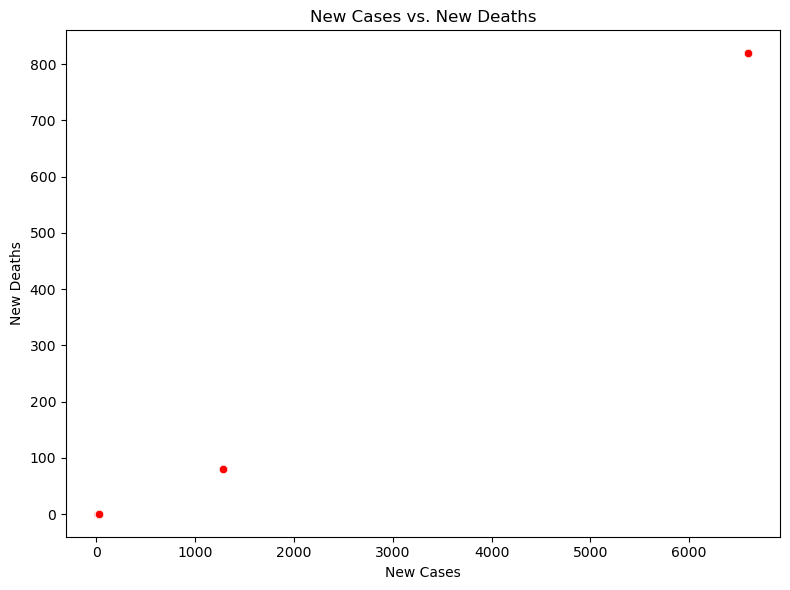

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

covid_data['date'] = pd.date_range(start='2020-01-01', periods=len(covid_data), freq='D')

covid_data['NewCases'] = pd.to_numeric(covid_data['NewCases'], errors='coerce')
covid_data['NewDeaths'] = pd.to_numeric(covid_data['NewDeaths'], errors='coerce')

covid_data.dropna(subset=['date', 'NewCases', 'NewDeaths'], inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(covid_data['date'], covid_data['NewCases'], label='Daily Cases', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 Daily Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=covid_data, x='NewCases', y='NewDeaths', color='red')
plt.title('New Cases vs. New Deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.tight_layout()
plt.show()


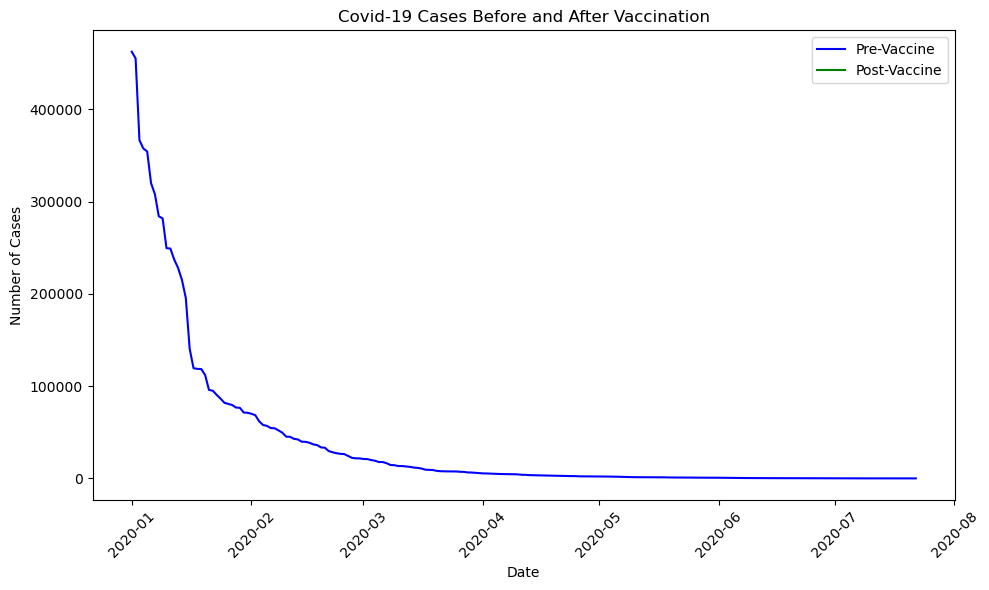

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

covid_data['date'] = pd.to_datetime(covid_data['date'], errors='coerce')

covid_data['TotalCases'] = pd.to_numeric(covid_data['TotalCases'], errors='coerce')

covid_data.dropna(subset=['date', 'TotalCases'], inplace=True)

pre_vaccine = covid_data[covid_data['date'] < '2021-01-01']
post_vaccine = covid_data[covid_data['date'] >= '2021-01-01']
plt.figure(figsize=(10, 6))
sns.lineplot(data=pre_vaccine, x='date', y='TotalCases', label='Pre-Vaccine', color='blue')
sns.lineplot(data=post_vaccine, x='date', y='TotalCases', label='Post-Vaccine', color='green')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Covid-19 Cases Before and After Vaccination')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()
